## Example Code - CAPM Beta for a given return sample
## Single (Constant) Sample Date Window

In [1]:
# Import the libraries:

import pandas as pd
import yfinance as yf
import statsmodels.api as sm

# Specify the risky asset and the time horizon:
TICKERS= ['AMZN', 'TSLA', 'JPM', 'RACE', '^GSPC', '^IRX']
#MARKET_BENCHMARK = '^GSPC'
#RISK_FREE_RATE = '^IRX' # omit risk free rate for now assume Rf = 0 
START_DATE = '2014-01-01'
END_DATE = '2021-12-31'

In [2]:
# Download the necessary data from Yahoo Finance:
df = yf.download(TICKERS,
                 start=START_DATE,
                 end=END_DATE,
                 progress=False)

df

Adj Close                                                   \
                  AMZN         JPM        RACE        TSLA        ^GSPC   
Date                                                                      
2014-01-02   19.898500   44.047371         NaN   10.006667  1831.979980   
2014-01-03   19.822001   44.387886         NaN    9.970667  1831.369995   
2014-01-06   19.681499   44.645164         NaN    9.800000  1826.770020   
2014-01-07   19.901501   44.130604         NaN    9.957333  1837.880005   
2014-01-08   20.096001   44.546795         NaN   10.085333  1837.489990   
...                ...         ...         ...         ...          ...   
2021-12-23  171.068497  147.128326  249.970276  355.666656  4725.790039   
2021-12-27  169.669495  147.970337  254.585846  364.646667  4791.189941   
2021-12-28  170.660995  148.419403  253.954636  362.823334  4786.350098   
2021-12-29  169.201004  148.344559  254.250488  362.063324  4793.060059   
2021-12-30  168.644501  148.269714  253.293854  356.779999  4778.729980   

                        Close                                      ...  \
             ^IRX        AMZN         JPM        RACE        TSLA  ...   
Date                                                               ...   
2014-01-02  0.058   19.898500   58.209999         NaN   10.006667  ...   
2014-01-03  0.058   19.822001   58.660000         NaN    9.970667  ...   
2014-01-06  0.045   19.681499   59.000000         NaN    9.800000  ...   
2014-01-07  0.043   19.901501   58.320000         NaN    9.957333  ...   
2014-01-08  0.040   20.096001   58.869999         NaN   10.085333  ...   
...           ...         ...         ...         ...         ...  ...   
2021-12-23  0.058  171.068497  157.259995  253.460007  355.666656  ...   
2021-12-27  0.043  169.669495  158.160004  258.140015  364.646667  ...   
2021-12-28  0.050  170.660995  158.639999  257.500000  362.823334  ...   
2021-12-29  0.045  169.201004  158.559998  257.799988  362.063324  ...   
2021-12-30  0.025  168.644501  158.479996  256.829987  356.779999  ...   

                  Open                                    Volume            \
                  RACE        TSLA        ^GSPC   ^IRX      AMZN       JPM   
Date                                                                         
2014-01-02         NaN    9.986667  1845.859985  0.060  42756000  15627600   
2014-01-03         NaN   10.000000  1833.209961  0.060  44204000  14214100   
2014-01-06         NaN   10.000000  1832.310059  0.055  63412000  17550700   
2014-01-07         NaN    9.841333  1828.709961  0.048  38320000  17851200   
2014-01-08         NaN    9.923333  1837.900024  0.037  46330000  14687400   
...                ...         ...          ...    ...       ...       ...   
2021-12-23  250.000000  335.600006  4703.959961  0.058  36788000   8055200   
2021-12-27  254.679993  357.890015  4733.990234  0.063  58688000   6188100   
2021-12-28  258.309998  369.829987  4795.490234  0.065  54638000   6342300   
2021-12-29  256.500000  366.213318  4788.640137  0.040  35754000   6398900   
2021-12-30  257.049988  353.776672  4794.229980  0.033  37584000   6948200   

                                                 
                RACE      TSLA       ^GSPC ^IRX  
Date                                             
2014-01-02       NaN  92826000  3080600000  0.0  
2014-01-03       NaN  70425000  2774270000  0.0  
2014-01-06       NaN  80416500  3294850000  0.0  
2014-01-07       NaN  75511500  3511750000  0.0  
2014-01-08       NaN  92448000  3652140000  0.0  
...              ...       ...         ...  ...  
2021-12-23  223300.0  92713200  2913040000  0.0  
2021-12-27  169000.0  71145900  2770290000  0.0  
2021-12-28  142300.0  60324000  2707920000  0.0  
2021-12-29  119400.0  56154000  2963310000  0.0  
2021-12-30  168200.0  47040900  3124950000  0.0  

[2014 rows x 36 columns]

In [3]:
# Resample to monthly data and calculate the simple returns:
X = df['Adj Close'].resample('W') \
                   .last() \
                   .pct_change() \
                   .dropna()



In [4]:
# Prepare the input and estimate the CAPM as a linear regression:
Retx = X['AMZN']
Rm_Rf = X['^GSPC']- X['^IRX']*0.01/52  # we need to adjust the annual %interest rate to weekly rate
Rm_Rf = sm.add_constant(Rm_Rf).rename(columns={'const' : 'Constant', 0: 'Rm_Rf'})


capm_model = sm.OLS(Retx, Rm_Rf).fit()
print(capm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     128.5
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           2.76e-25
Time:                        09:36:19   Log-Likelihood:                 657.59
No. Observations:                 323   AIC:                            -1311.
Df Residuals:                     321   BIC:                            -1304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       0.0037      0.002      2.059      0.0

### Rolling Window Estimates: The idea is to repeat the beta estimation over different sub-samples
##### One can repeat the regression over a series of subsamples generated with a while- or for- loop
#####  Or there is a module to quickly run rolling regression

In [5]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS


rols = RollingOLS(Retx, Rm_Rf, window=150) # the choice of window is arbitrary in this example

<AxesSubplot:title={'center':'Rolling Beta Estimate'}, xlabel='Date'>

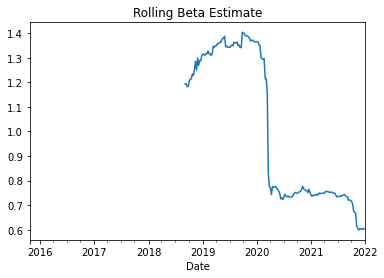

In [6]:
rolling_coefficients = rols.fit().params
# View and plot the paramaters estimated
rolling_coefficients
rolling_coefficients['Rm_Rf'].plot(title ='Rolling Beta Estimate')

#.................put the plot command here 